In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2020-07-28 16:54:55--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.31.81.48, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2020-07-28 16:54:56 (33.6 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

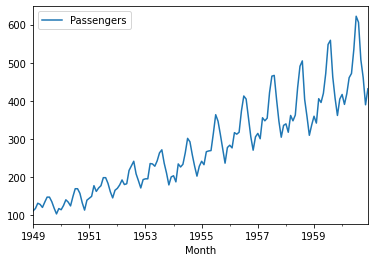

In [ ]:
df.plot();

In [ ]:
adfuller(df['Passengers'])

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

In [ ]:
# first 2 return values are test-statistic and p-value
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html

In [ ]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [ ]:
adf(df['Passengers'])

Test-Statistic: 0.815368879206047
P-Value: 0.991880243437641
Non-Stationary


In [ ]:
adf(np.random.randn(100))

Test-Statistic: -10.430311693487361
P-Value: 1.6171591927157695e-18
Stationary


In [ ]:
adf(np.random.gamma(1, 1, 100))

Test-Statistic: -9.435092438769173
P-Value: 5.067548516218232e-16
Stationary


In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])

In [ ]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069605
P-Value: 0.42236677477039125
Non-Stationary


In [ ]:
df['Diff'] = df['Passengers'].diff()

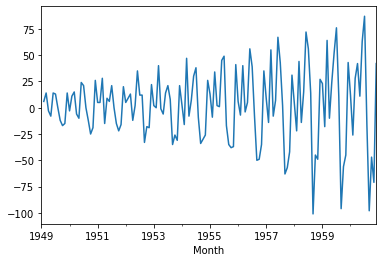

In [ ]:
df['Diff'].plot()

In [ ]:
adf(df['Diff'].dropna())

Test-Statistic: -2.8292668241700056
P-Value: 0.054213290283824704
Non-Stationary


In [ ]:
df['DiffLog'] = df['LogPassengers'].diff()

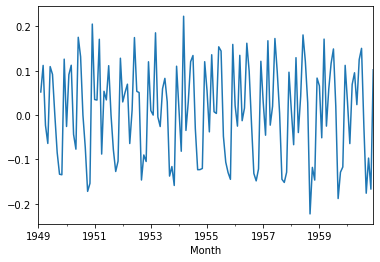

In [ ]:
df['DiffLog'].plot()

In [ ]:
adf(df['DiffLog'].dropna())

Test-Statistic: -2.7171305983881284
P-Value: 0.0711205481508595
Non-Stationary


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2020-07-28 17:02:58--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 172.67.213.166, 104.31.81.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  23.7MB/s    in 1.0s    

2020-07-28 17:03:00 (23.7 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [ ]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [ ]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [ ]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

In [ ]:
goog['LogPrice'] = np.log(goog['Close'])

In [ ]:
goog['LogRet'] = goog['LogPrice'].diff()

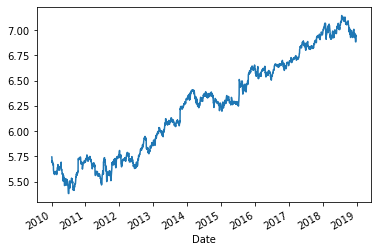

In [ ]:
goog['LogPrice'].plot();

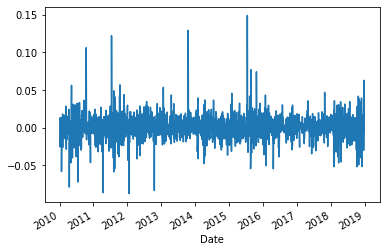

In [ ]:
goog['LogRet'].plot();

In [ ]:
adf(goog['LogPrice'])

Test-Statistic: -0.41819025789061354
P-Value: 0.9070170677498408
Non-Stationary


In [ ]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.667480227736796
P-Value: 0.0
Stationary


In [ ]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

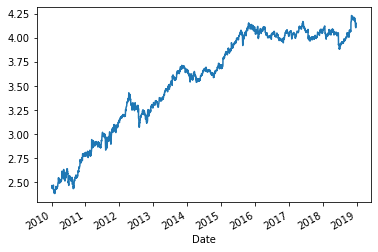

In [ ]:
sbux['LogPrice'].plot();

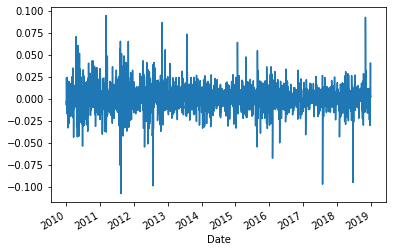

In [ ]:
sbux['LogRet'].plot();

In [ ]:
adf(sbux['LogPrice'])

Test-Statistic: -1.9020133583900019
P-Value: 0.3311145569853752
Non-Stationary


In [ ]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426957984
P-Value: 0.0
Stationary
